# Import Packages and Data

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

import scipy

import matplotlib.pyplot as plt
from matplotlib import pyplot

from pylab import rcParams

import urllib

import os
from datetime import datetime

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.feature_selection import SelectFromModel

!pip install pydot
import pydot
!pip install graphviz

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import seaborn as sb



C:\Users\vnnair\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 28, 20
plt.style.use('seaborn-whitegrid')

In [4]:
# if using Windows:
path_to_data = r'C:\Users\vnnair\Documents\WORK\PYTHON Course Files\PERSONAL WORK\COMO_Prediction_Practice\COMOCustomerData.csv'

In [5]:
#def parser(x):
#    return datetime.strptime(x, '%m/%d/%Y %H:%M')

#COMOraw = pd.read_csv(path_to_data, parse_dates=[1,2], date_parser=parser)

COMOraw = pd.read_csv(path_to_data)

COMOraw.head(10)

,period_group,first_day,last_day,postal_code,warehouse_id,subscription_type,MarketPlace Id,ship_option,como_order_count,como_lapsed,...,como_acu,como_upo,como_aos,como_active_fmops,como_sub_units,como_short_units,como_sub_unit_rate,como_short_unit_rate,prime_count,fresh_count
0,T30D,5/4/2018 0:00,6/3/2018 0:00,98136.0,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,LAPSED,...,3.6178,13.0,64.9709,134.2733,0.0,0.0,0.0,0.0,182745.0,13113.0
1,T30D,11/7/2017 0:00,12/7/2017 0:00,98103.0,FSE2,PAID,1.0,fresh-pickup,REPEAT,ACTIVE,...,3.0293,19.0,74.2100,87.7027,0.0,0.0,0.0,0.0,265863.0,2262.0
2,T30D,5/23/2018 0:00,6/22/2018 0:00,98119.0,FSE2,PAID,1.0,fresh-express-pickup,REPEAT,LAPSED,...,3.5703,11.0,55.4288,78.5241,0.0,0.0,0.0,0.0,363222.0,25738.0
3,T30D,8/23/2018 0:00,9/22/2018 0:00,98029.0,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,LAPSED,...,2.5148,26.0,91.5100,91.5100,0.0,0.0,0.0,0.0,37196.0,2424.0
4,Quarter,10/1/2017 0:00,12/31/2017 0:00,98106.0,FSE3,NO_PLAN,1.0,fresh-pickup,FIRST,LAPSED,...,3.9811,11.0,58.7800,58.7800,0.0,0.0,0.0,0.0,770076.0,4860.0
5,T30D,10/15/2017 0:00,11/14/2017 0:00,98020.0,FSE2,NO_PLAN,1.0,fresh-pickup,REPEAT,LAPSED,...,2.1085,10.0,27.3400,54.6800,0.0,0.0,0.0,0.0,13434.0,76.0
6,T30D,4/10/2018 0:00,5/10/2018 0:00,98115.0,FSE2,NO_PLAN,1.0,fresh-pickup,REPEAT,LAPSED,...,2.5918,27.0,94.9392,177.2200,0.0,0.0,0.0,0.0,535724.0,34608.0
7,T30D,7/26/2018 0:00,8/25/2018 0:00,NaN,FSE2,NO_PLAN,1.0,fresh-pickup,REPEAT,ACTIVE,...,4.2593,10.0,60.4910,73.7234,0.0,0.0,0.0,0.0,NaN,NaN
8,T30D,7/30/2018 0:00,8/29/2018 0:00,98133.0,FSE2,NO_PLAN,1.0,fresh-pickup,REPEAT,LAPSED,...,3.3795,12.0,57.2725,88.7725,0.0,0.0,0.0,0.0,469402.0,23405.0
9,T30D,3/28/2018 0:00,4/27/2018 0:00,98118.0,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,ACTIVE,...,3.0714,10.0,42.3722,59.3211,0.0,0.0,0.0,0.0,579425.0,10976.0


# Modify Dataframe

In [6]:
COMOraw.describe()

,postal_code,MarketPlace Id,como_order_cust,como_orders,como_units,como_ops,como_pcogs,como_asp,como_acu,como_upo,como_aos,como_active_fmops,como_sub_units,como_short_units,como_sub_unit_rate,como_short_unit_rate,prime_count,fresh_count
count,330726.000000,358039.0,358039.000000,358039.000000,358039.000000,358039.000000,358039.000000,358039.000000,358039.000000,358039.000000,358039.000000,358039.000000,358039.0,358039.0,358039.0,358039.0,3.307260e+05,3.307260e+05
mean,98105.136345,1.0,5.758627,7.948919,144.326735,498.982943,355.858989,4.075934,3.216422,14.689821,54.797543,67.507996,0.0,0.0,0.0,0.0,9.547519e+04,4.730968e+03
std,49.618047,0.0,14.818212,22.253057,543.324900,1866.168302,1089.687762,2.567057,2.215217,10.826343,37.505975,51.876739,0.0,0.0,0.0,0.0,3.737891e+05,3.192811e+04
min,98004.000000,1.0,1.000000,1.000000,1.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.010000,0.010000,0.0,0.0,0.0,0.0,1.210000e+02,1.000000e+00
25%,98075.000000,1.0,1.000000,1.000000,13.000000,44.220000,33.810000,3.043300,2.323000,7.000000,28.053300,33.304000,0.0,0.0,0.0,0.0,1.056300e+04,1.540000e+02
50%,98109.000000,1.0,2.000000,2.000000,32.000000,108.580000,81.430000,3.643300,2.812000,13.000000,49.603000,58.500000,0.0,0.0,0.0,0.0,2.045200e+04,6.060000e+02
75%,98126.000000,1.0,4.000000,5.000000,90.000000,313.070000,231.750000,4.440900,3.465400,19.000000,72.575000,88.410750,0.0,0.0,0.0,0.0,5.827200e+04,1.870000e+03
max,98296.000000,1.0,682.000000,905.000000,52092.000000,183783.060000,45508.370000,89.950000,59.080000,155.000000,468.480000,1529.400000,0.0,0.0,0.0,0.0,3.361804e+07,5.474345e+06


In [7]:
COMOraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358040 entries, 0 to 358039
Data columns (total 26 columns):
period_group            358040 non-null object
first_day               358039 non-null object
last_day                358039 non-null object
postal_code             330726 non-null float64
warehouse_id            358039 non-null object
subscription_type       358039 non-null object
MarketPlace Id          358039 non-null float64
ship_option             358039 non-null object
como_order_count        358039 non-null object
como_lapsed             358039 non-null object
como_order_cust         358039 non-null float64
como_orders             358039 non-null float64
como_units              358039 non-null float64
como_ops                358039 non-null float64
como_pcogs              358039 non-null float64
como_asp                358039 non-null float64
como_acu                358039 non-null float64
como_upo                358039 non-null float64
como_aos                358039 no

In [8]:
#Convert First Day into datetime format
COMOraw['first_day'] = pd.to_datetime(COMOraw['first_day'])

In [9]:
df = pd.DataFrame(COMOraw)
df.head()

,period_group,first_day,last_day,postal_code,warehouse_id,subscription_type,MarketPlace Id,ship_option,como_order_count,como_lapsed,...,como_acu,como_upo,como_aos,como_active_fmops,como_sub_units,como_short_units,como_sub_unit_rate,como_short_unit_rate,prime_count,fresh_count
0,T30D,2018-05-04,6/3/2018 0:00,98136.0,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,LAPSED,...,3.6178,13.0,64.9709,134.2733,0.0,0.0,0.0,0.0,182745.0,13113.0
1,T30D,2017-11-07,12/7/2017 0:00,98103.0,FSE2,PAID,1.0,fresh-pickup,REPEAT,ACTIVE,...,3.0293,19.0,74.2100,87.7027,0.0,0.0,0.0,0.0,265863.0,2262.0
2,T30D,2018-05-23,6/22/2018 0:00,98119.0,FSE2,PAID,1.0,fresh-express-pickup,REPEAT,LAPSED,...,3.5703,11.0,55.4288,78.5241,0.0,0.0,0.0,0.0,363222.0,25738.0
3,T30D,2018-08-23,9/22/2018 0:00,98029.0,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,LAPSED,...,2.5148,26.0,91.5100,91.5100,0.0,0.0,0.0,0.0,37196.0,2424.0
4,Quarter,2017-10-01,12/31/2017 0:00,98106.0,FSE3,NO_PLAN,1.0,fresh-pickup,FIRST,LAPSED,...,3.9811,11.0,58.7800,58.7800,0.0,0.0,0.0,0.0,770076.0,4860.0


In [10]:
#drop all non-day period groups and wrong subscription types
df2 = df[df['period_group'] == 'Day']
df2 = df2[df2['subscription_type'] != 'TRIAL']
df2 = df2[df2['subscription_type'] != 'TRIAL-90-OFF-ALEXA']
df2 = df2[df2['subscription_type'] != 'TRIAL-90-OFF-DASH']
df2 = df2[df2['subscription_type'] != 'TRIAL-90-OFF-VOICE-HP']

#, 'TRIAL-90-OFF-ALEXA', 'TRIAL-90-OFF-DASH', 'TRIAL-90-OFF-VOICE-HP'
df2.head()

,period_group,first_day,last_day,postal_code,warehouse_id,subscription_type,MarketPlace Id,ship_option,como_order_count,como_lapsed,...,como_acu,como_upo,como_aos,como_active_fmops,como_sub_units,como_short_units,como_sub_unit_rate,como_short_unit_rate,prime_count,fresh_count
12,Day,2018-05-09,5/9/2018 0:00,NaN,FSE2,PAID,1.0,fresh-express-pickup,REPEAT,ACTIVE,...,2.8131,17.0,57.7781,66.0321,0.0,0.0,0.0,0.0,NaN,NaN
69,Day,2017-11-14,11/14/2017 0:00,NaN,FSE3,PAID,1.0,fresh-express-pickup,REPEAT,LAPSED,...,2.5792,8.0,27.6900,27.6900,0.0,0.0,0.0,0.0,NaN,NaN
103,Day,2018-03-01,3/1/2018 0:00,NaN,FSE3,PAID,1.0,fresh-express-pickup,REPEAT,ACTIVE,...,2.7433,13.0,50.4116,50.4116,0.0,0.0,0.0,0.0,NaN,NaN
126,Day,2018-02-04,2/4/2018 0:00,NaN,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,LAPSED,...,2.7066,18.0,69.8727,69.8727,0.0,0.0,0.0,0.0,NaN,NaN
158,Day,2018-01-20,1/20/2018 0:00,NaN,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,ACTIVE,...,3.0966,15.0,61.6226,61.6226,0.0,0.0,0.0,0.0,NaN,NaN


In [11]:
#Adding oldest date in dataset
df2['oldestdate'] = min(df2['first_day'])
df2.head()

#df_attr = df2[['warehouse_id', 'subscription_type', 'como_order_count']].copy()

,period_group,first_day,last_day,postal_code,warehouse_id,subscription_type,MarketPlace Id,ship_option,como_order_count,como_lapsed,...,como_upo,como_aos,como_active_fmops,como_sub_units,como_short_units,como_sub_unit_rate,como_short_unit_rate,prime_count,fresh_count,oldestdate
12,Day,2018-05-09,5/9/2018 0:00,NaN,FSE2,PAID,1.0,fresh-express-pickup,REPEAT,ACTIVE,...,17.0,57.7781,66.0321,0.0,0.0,0.0,0.0,NaN,NaN,2017-10-28
69,Day,2017-11-14,11/14/2017 0:00,NaN,FSE3,PAID,1.0,fresh-express-pickup,REPEAT,LAPSED,...,8.0,27.6900,27.6900,0.0,0.0,0.0,0.0,NaN,NaN,2017-10-28
103,Day,2018-03-01,3/1/2018 0:00,NaN,FSE3,PAID,1.0,fresh-express-pickup,REPEAT,ACTIVE,...,13.0,50.4116,50.4116,0.0,0.0,0.0,0.0,NaN,NaN,2017-10-28
126,Day,2018-02-04,2/4/2018 0:00,NaN,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,LAPSED,...,18.0,69.8727,69.8727,0.0,0.0,0.0,0.0,NaN,NaN,2017-10-28
158,Day,2018-01-20,1/20/2018 0:00,NaN,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,ACTIVE,...,15.0,61.6226,61.6226,0.0,0.0,0.0,0.0,NaN,NaN,2017-10-28


In [12]:
#Adding oldest date in dataset
df2['dayssince'] = df2['first_day'] - df2['oldestdate']  
df2['days_from_start'] = df2['dayssince'] / np.timedelta64(1, 'D')
df2['days_from_start'].head()
df2.head()

,period_group,first_day,last_day,postal_code,warehouse_id,subscription_type,MarketPlace Id,ship_option,como_order_count,como_lapsed,...,como_active_fmops,como_sub_units,como_short_units,como_sub_unit_rate,como_short_unit_rate,prime_count,fresh_count,oldestdate,dayssince,days_from_start
12,Day,2018-05-09,5/9/2018 0:00,NaN,FSE2,PAID,1.0,fresh-express-pickup,REPEAT,ACTIVE,...,66.0321,0.0,0.0,0.0,0.0,NaN,NaN,2017-10-28,193 days,193.0
69,Day,2017-11-14,11/14/2017 0:00,NaN,FSE3,PAID,1.0,fresh-express-pickup,REPEAT,LAPSED,...,27.6900,0.0,0.0,0.0,0.0,NaN,NaN,2017-10-28,17 days,17.0
103,Day,2018-03-01,3/1/2018 0:00,NaN,FSE3,PAID,1.0,fresh-express-pickup,REPEAT,ACTIVE,...,50.4116,0.0,0.0,0.0,0.0,NaN,NaN,2017-10-28,124 days,124.0
126,Day,2018-02-04,2/4/2018 0:00,NaN,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,LAPSED,...,69.8727,0.0,0.0,0.0,0.0,NaN,NaN,2017-10-28,99 days,99.0
158,Day,2018-01-20,1/20/2018 0:00,NaN,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,ACTIVE,...,61.6226,0.0,0.0,0.0,0.0,NaN,NaN,2017-10-28,84 days,84.0


In [13]:
#Get Site Dummies
site_dummies = pd.get_dummies(df2['warehouse_id'])
site_dummies.head()

,FSE2,FSE3
12,1,0
69,0,1
103,0,1
126,0,1
158,0,1


In [14]:
#Get Subscription Dummies
subscription_dummies = pd.get_dummies(df2['subscription_type'])
subscription_dummies.head()

,NO_PLAN,PAID
12,0,1
69,0,1
103,0,1
126,1,0
158,1,0


In [15]:
#Get Order Count Dummies
ordercount_dummies = pd.get_dummies(df2['como_order_count'])
ordercount_dummies.head()

,FIRST,REPEAT
12,0,1
69,0,1
103,0,1
126,0,1
158,0,1


In [16]:
#Create DOTW, Month, and Year variables
df2['dotw'] = df2['first_day'].dt.day_name()
df2['month'] = df2['first_day'].dt.strftime('%b')
#needed to use different format because using older version of pandas
df2['year'] = df2['first_day'].apply(lambda x: x.year)
df2.head()

,period_group,first_day,last_day,postal_code,warehouse_id,subscription_type,MarketPlace Id,ship_option,como_order_count,como_lapsed,...,como_sub_unit_rate,como_short_unit_rate,prime_count,fresh_count,oldestdate,dayssince,days_from_start,dotw,month,year
12,Day,2018-05-09,5/9/2018 0:00,NaN,FSE2,PAID,1.0,fresh-express-pickup,REPEAT,ACTIVE,...,0.0,0.0,NaN,NaN,2017-10-28,193 days,193.0,Wednesday,May,2018
69,Day,2017-11-14,11/14/2017 0:00,NaN,FSE3,PAID,1.0,fresh-express-pickup,REPEAT,LAPSED,...,0.0,0.0,NaN,NaN,2017-10-28,17 days,17.0,Tuesday,Nov,2017
103,Day,2018-03-01,3/1/2018 0:00,NaN,FSE3,PAID,1.0,fresh-express-pickup,REPEAT,ACTIVE,...,0.0,0.0,NaN,NaN,2017-10-28,124 days,124.0,Thursday,Mar,2018
126,Day,2018-02-04,2/4/2018 0:00,NaN,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,LAPSED,...,0.0,0.0,NaN,NaN,2017-10-28,99 days,99.0,Sunday,Feb,2018
158,Day,2018-01-20,1/20/2018 0:00,NaN,FSE3,NO_PLAN,1.0,fresh-pickup,REPEAT,ACTIVE,...,0.0,0.0,NaN,NaN,2017-10-28,84 days,84.0,Saturday,Jan,2018


In [17]:
dotw_dummies = pd.get_dummies(df2['dotw'])
month_dummies = pd.get_dummies(df2['month'])
year_dummies = pd.get_dummies(df2['year'])

In [18]:
#Concatenated all the dummy variable tables, dropped all confounding or duplicate variables

df3 = pd.concat([df2,site_dummies, subscription_dummies, ordercount_dummies, dotw_dummies, month_dummies, year_dummies], axis=1)
df3.drop(['postal_code', 'period_group', 'last_day', 'MarketPlace Id', 'ship_option'
         , 'como_lapsed', 'como_order_cust', 'como_orders', 'como_units', 'como_pcogs', 'como_asp'
         , 'como_acu', 'como_upo', 'como_ops', 'como_active_fmops', 'como_sub_units', 'como_short_units'
         , 'como_sub_unit_rate', 'como_short_unit_rate', 'prime_count', 'fresh_count', 'first_day'
         , 'warehouse_id', 'subscription_type', 'como_order_count', 'oldestdate', 'dayssince'
         , 'dotw', 'month', 'FSE3', 'NO_PLAN', 'REPEAT', 'Friday', 'Dec', 'year', 2017], inplace=True, axis=1)
df3.head()

,como_aos,days_from_start,FSE2,PAID,FIRST,Monday,Saturday,Sunday,Thursday,Tuesday,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,2018
12,57.7781,193.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
69,27.6900,17.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
103,50.4116,124.0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
126,69.8727,99.0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
158,61.6226,84.0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


# Summary Statistics

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 12 to 358003
Data columns (total 23 columns):
como_aos           9568 non-null float64
days_from_start    9568 non-null float64
FSE2               9568 non-null uint8
PAID               9568 non-null uint8
FIRST              9568 non-null uint8
Monday             9568 non-null uint8
Saturday           9568 non-null uint8
Sunday             9568 non-null uint8
Thursday           9568 non-null uint8
Tuesday            9568 non-null uint8
Wednesday          9568 non-null uint8
Apr                9568 non-null uint8
Aug                9568 non-null uint8
Feb                9568 non-null uint8
Jan                9568 non-null uint8
Jul                9568 non-null uint8
Jun                9568 non-null uint8
Mar                9568 non-null uint8
May                9568 non-null uint8
Nov                9568 non-null uint8
Oct                9568 non-null uint8
Sep                9568 non-null uint8
2018               9568 non-

In [20]:
#Not worth it with so many binary variables
#sb.pairplot(df3)

In [21]:
print (df3.corr())

                 como_aos  days_from_start      FSE2      PAID     FIRST  \
como_aos         1.000000         0.066190  0.181371  0.119889  0.083755   
days_from_start  0.066190         1.000000  0.014064 -0.021152 -0.159726   
FSE2             0.181371         0.014064  1.000000 -0.002054  0.011357   
PAID             0.119889        -0.021152 -0.002054  1.000000 -0.057861   
FIRST            0.083755        -0.159726  0.011357 -0.057861  1.000000   
Monday          -0.017873         0.013312 -0.006457  0.007846  0.001234   
Saturday         0.138222         0.005644  0.015818  0.000611 -0.009393   
Sunday           0.176654         0.017688  0.015342  0.012053  0.020768   
Thursday        -0.090605        -0.022482 -0.005031 -0.006314 -0.014885   
Tuesday         -0.094374        -0.015427 -0.013373 -0.012499  0.029100   
Wednesday       -0.116327        -0.042405 -0.008501 -0.001861 -0.017309   
Apr             -0.038322        -0.000372 -0.010131 -0.002053 -0.020476   
Aug         

In [22]:
df3.describe()

,como_aos,days_from_start,FSE2,PAID,FIRST,Monday,Saturday,Sunday,Thursday,Tuesday,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,2018
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,...,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,58.993241,171.877195,0.512855,0.503344,0.336120,0.139946,0.140155,0.156982,0.141304,0.148098,...,0.081417,0.093959,0.080790,0.075564,0.087479,0.081208,0.092705,0.076191,0.075669,0.793374
std,32.346113,105.022747,0.499861,0.500015,0.472405,0.346949,0.347166,0.363802,0.348353,0.355215,...,0.273489,0.291787,0.272527,0.264314,0.282551,0.273169,0.290034,0.265318,0.264481,0.404906
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.101925,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,55.759150,167.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,74.281875,263.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,434.840000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Linear Regression Model

In [23]:
xvar = df3.iloc[:, 1:23]
yvar = df3['como_aos']

lmX, lmy = scale(xvar), yvar

In [1]:
xvar_list = xvar.columns.get_values()
xvar_list.tolist()

NameError: name 'xvar' is not defined

In [25]:
#Tells which rows have a missing value
missing_values = lmX==np.NAN
lmX[missing_values == True]

array([], dtype=float64)

In [26]:
lmy.head()

12     57.7781
69     27.6900
103    50.4116
126    69.8727
158    61.6226
Name: como_aos, dtype: float64

In [27]:
lm = LinearRegression()

lm.fit(lmX, lmy)

print (lm.score(lmX, lmy))

0.13068747712454754


In [28]:
print (lmX)
#lmX.shape

[[ 0.20113651  0.97461148  0.99333326 ... -0.28718529 -0.28611783
   0.51033322]
 [-1.47477849 -1.02604989  0.99333326 ... -0.28718529 -0.28611783
  -1.95950403]
 [-0.45589835 -1.02604989  0.99333326 ... -0.28718529 -0.28611783
   0.51033322]
 ...
 [-0.97962179 -1.02604989 -1.00671148 ... -0.28718529 -0.28611783
   0.51033322]
 [-1.43668952 -1.02604989  0.99333326 ... -0.28718529 -0.28611783
  -1.95950403]
 [-0.64634324  0.97461148 -1.00671148 ... -0.28718529 -0.28611783
   0.51033322]]


In [29]:
#Set train and test set
lmX_train, lmX_test, lmy_train, lmy_test = train_test_split(lmX, lmy, test_size=.25, random_state=0)

In [30]:
lm.fit(lmX_train,lmy_train)

print (lm.score(lmX_train,lmy_train))

0.13477167632035103


In [31]:
lm.fit(lmX_train,lmy_train)

print (lm.score(lmX_test,lmy_test))

0.11434686385323813


In [32]:
lmy_pred = lm.predict(lmX_test)

In [33]:
#Figuring out the top 
Pred_LMy = pd.DataFrame(lmy_pred)
Test_LMy = pd.DataFrame(lmy_test)
print (Pred_LMy.head())
print (Test_LMy.head())

           0
0  47.461677
1  56.474694
2  64.785123
3  63.646274
4  47.548866
        como_aos
182807   56.8883
67794    73.0650
106685   43.0000
291703   24.5900
265420   23.5372


In [34]:
#MSE
print (np.mean((abs(lmy_pred-lmy_test))**2))

983.3399844277593


In [35]:
#Mean Absolute Errors
errors = abs(lmy_pred - lmy_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 21.63 degrees.


In [36]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / lmy_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')

In [37]:
print ('Estimated Intercept Coefficient:', round(lm.intercept_,2))

Estimated Intercept Coefficient: 58.79


In [38]:
print ('Coefficients:', lm.coef_)

Coefficients: [-0.53377035  5.54660104  3.59994016  2.73373606 -0.43717472  3.93721578
  4.65947687 -2.55743961 -2.38554378 -3.19202346 -5.36281673 -2.27784385
 -4.26620979 -4.60549632 -2.91580901 -3.66027147 -3.58442736 -4.03873791
 -0.51873259 -3.40674075 -2.20618113  6.60683866]


In [39]:
lm.coef_.tolist()

[-0.5337703480208984,
 5.546601035860916,
 3.5999401595987655,
 2.73373606029251,
 -0.43717472355474996,
 3.937215784169019,
 4.659476872931244,
 -2.5574396128172916,
 -2.3855437801363237,
 -3.1920234558391996,
 -5.36281673141855,
 -2.277843845348538,
 -4.266209789398795,
 -4.605496323354426,
 -2.915809012434299,
 -3.660271465610917,
 -3.5844273576918826,
 -4.038737906268016,
 -0.5187325934169265,
 -3.40674075144181,
 -2.2061811294223834,
 6.606838661556675]

In [40]:
lmCOEF = np.insert(lm.coef_, 0, round(lm.intercept_,2))
lmCOEF

array([58.79      , -0.53377035,  5.54660104,  3.59994016,  2.73373606,
       -0.43717472,  3.93721578,  4.65947687, -2.55743961, -2.38554378,
       -3.19202346, -5.36281673, -2.27784385, -4.26620979, -4.60549632,
       -2.91580901, -3.66027147, -3.58442736, -4.03873791, -0.51873259,
       -3.40674075, -2.20618113,  6.60683866])

In [41]:
lmvar_list = np.insert(xvar_list, 0, 'Intercept')
lmvar_list

array(['Intercept', 'days_from_start', 'FSE2', 'PAID', 'FIRST', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Apr',
       'Aug', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 2018], dtype=object)

In [42]:
#Combine variable and coefficients
lm_coefs = list(zip(lmvar_list, lmCOEF))
lm_coefs

[('Intercept', 58.79),
 ('days_from_start', -0.5337703480208984),
 ('FSE2', 5.546601035860916),
 ('PAID', 3.5999401595987655),
 ('FIRST', 2.73373606029251),
 ('Monday', -0.43717472355474996),
 ('Saturday', 3.937215784169019),
 ('Sunday', 4.659476872931244),
 ('Thursday', -2.5574396128172916),
 ('Tuesday', -2.3855437801363237),
 ('Wednesday', -3.1920234558391996),
 ('Apr', -5.36281673141855),
 ('Aug', -2.277843845348538),
 ('Feb', -4.266209789398795),
 ('Jan', -4.605496323354426),
 ('Jul', -2.915809012434299),
 ('Jun', -3.660271465610917),
 ('Mar', -3.5844273576918826),
 ('May', -4.038737906268016),
 ('Nov', -0.5187325934169265),
 ('Oct', -3.40674075144181),
 ('Sep', -2.2061811294223834),
 (2018, 6.606838661556675)]

In [43]:
#Exporting coefficient name
#BLANKING OUT TIL NEEDED
#lmcoef_list = pd.DataFrame(lm_coefs, columns=['Linear Model Variable', 'Linear Model Coefficient Value']).to_csv('LinearModelCoefficients.csv')

# Visualizing Correlations

In [44]:
#Finding top correlated variables
a = df3.corr()
a = a.loc[:, 'como_aos']
a = a.reset_index()
b = a[a.como_aos>0.05]
b = b.reset_index()
b
#Find out that a customer who is shopping at Ballard, a Paid customer, or shops on a Saturday or Sunday 
#has a high correlation to AOS

,level_0,index,como_aos
0,0,como_aos,1.000000
1,1,days_from_start,0.066190
2,2,FSE2,0.181371
3,3,PAID,0.119889
4,4,FIRST,0.083755
5,6,Saturday,0.138222
6,7,Sunday,0.176654
7,21,Sep,0.056174


In [45]:
c = a[a.como_aos<-0.05]
c = c.reset_index()
c
#Find out that a customer shopping on Wednesday has a negative correlation to their AOS

,level_0,index,como_aos
0,8,Thursday,-0.090605
1,9,Tuesday,-0.094374
2,10,Wednesday,-0.116327


In [46]:
df_attr = df2[['warehouse_id', 'subscription_type', 'como_order_count']].copy()
df_attr

,warehouse_id,subscription_type,como_order_count
12,FSE2,PAID,REPEAT
69,FSE3,PAID,REPEAT
103,FSE3,PAID,REPEAT
126,FSE3,NO_PLAN,REPEAT
158,FSE3,NO_PLAN,REPEAT
170,FSE3,PAID,REPEAT
185,FSE3,PAID,FIRST
211,FSE3,PAID,REPEAT
213,FSE3,NO_PLAN,FIRST
222,FSE2,PAID,REPEAT


In [47]:
#Creating table for seaborn plotting
df_numvar = df3[['como_aos','days_from_start']].copy()
df_plot = pd.concat([df_numvar,df_attr], axis=1)
df_plot.head()

,como_aos,days_from_start,warehouse_id,subscription_type,como_order_count
12,57.7781,193.0,FSE2,PAID,REPEAT
69,27.6900,17.0,FSE3,PAID,REPEAT
103,50.4116,124.0,FSE3,PAID,REPEAT
126,69.8727,99.0,FSE3,NO_PLAN,REPEAT
158,61.6226,84.0,FSE3,NO_PLAN,REPEAT


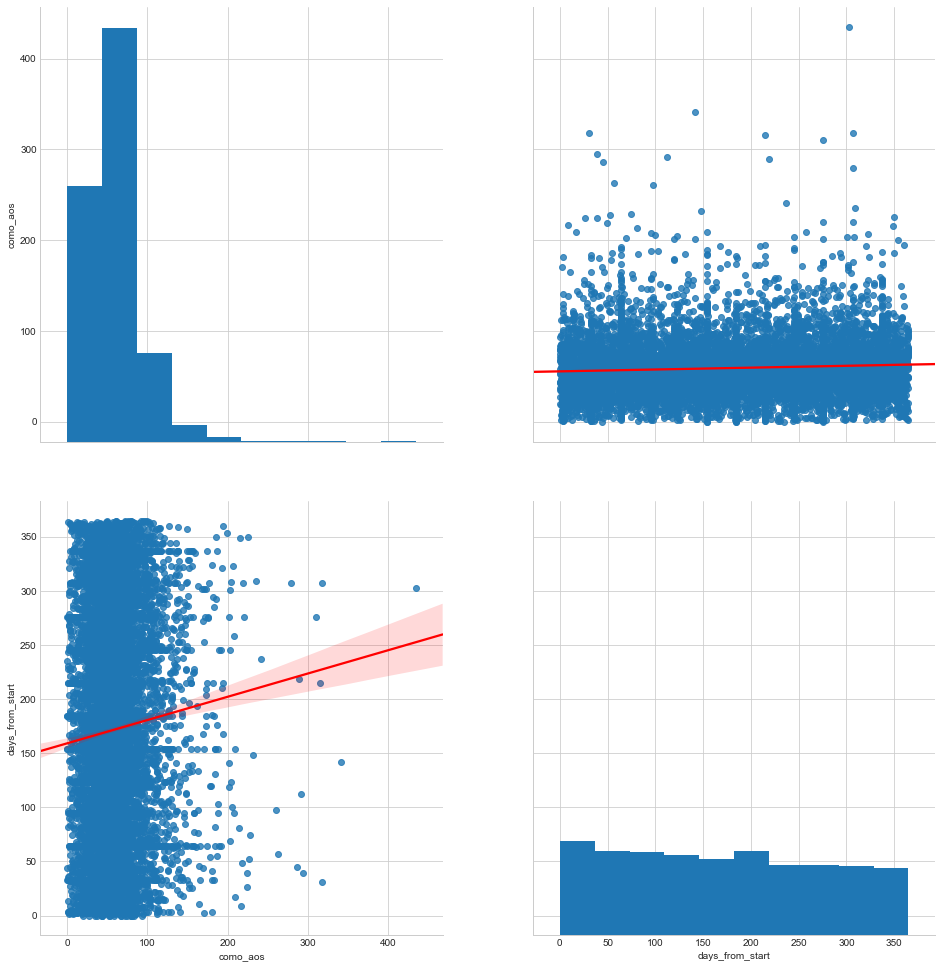

In [48]:
#Plotting out the original relation between COMO_AOS and Days from Start
g=sb.pairplot(df_plot, kind="reg", plot_kws={'line_kws':{'color':'red'}})
g.fig.set_size_inches(15,15)

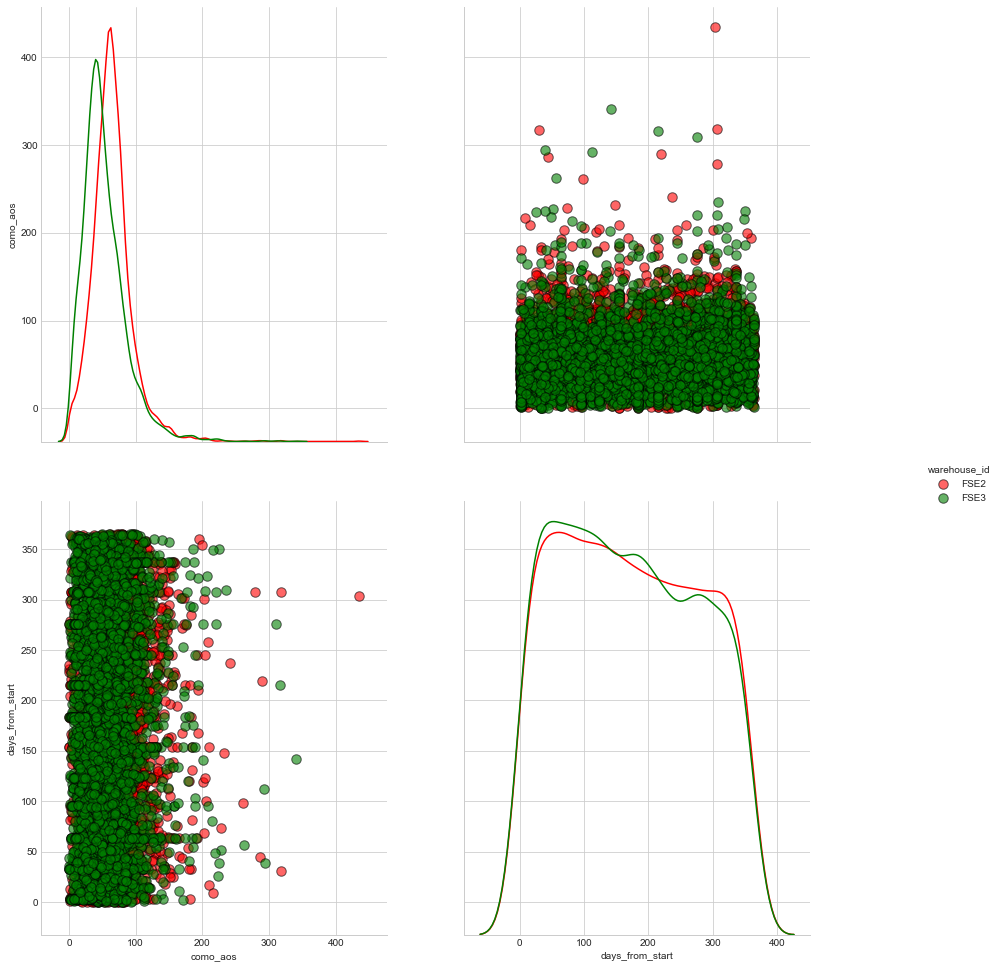

In [49]:
g=sb.pairplot(df_plot, hue = 'warehouse_id', palette=["red", "green"], diag_kind = 'kde', 
              plot_kws = {'alpha': 0.6, 's': 90, 'edgecolor': 'k'})
g.fig.set_size_inches(15,15)

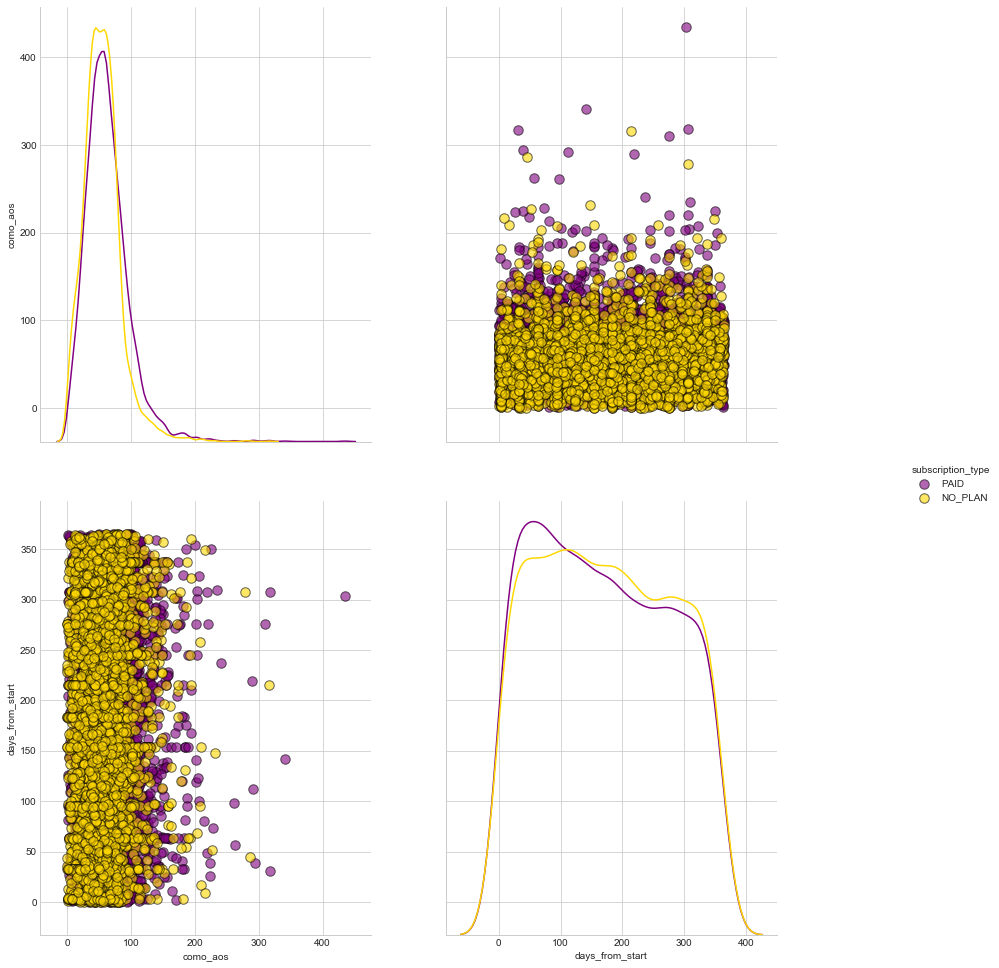

In [50]:
g=sb.pairplot(df_plot, hue = 'subscription_type', diag_kind = 'kde', palette=["purple", "gold"],
              plot_kws = {'alpha': 0.6, 's': 90, 'edgecolor': 'k'})
g.fig.set_size_inches(15,15)

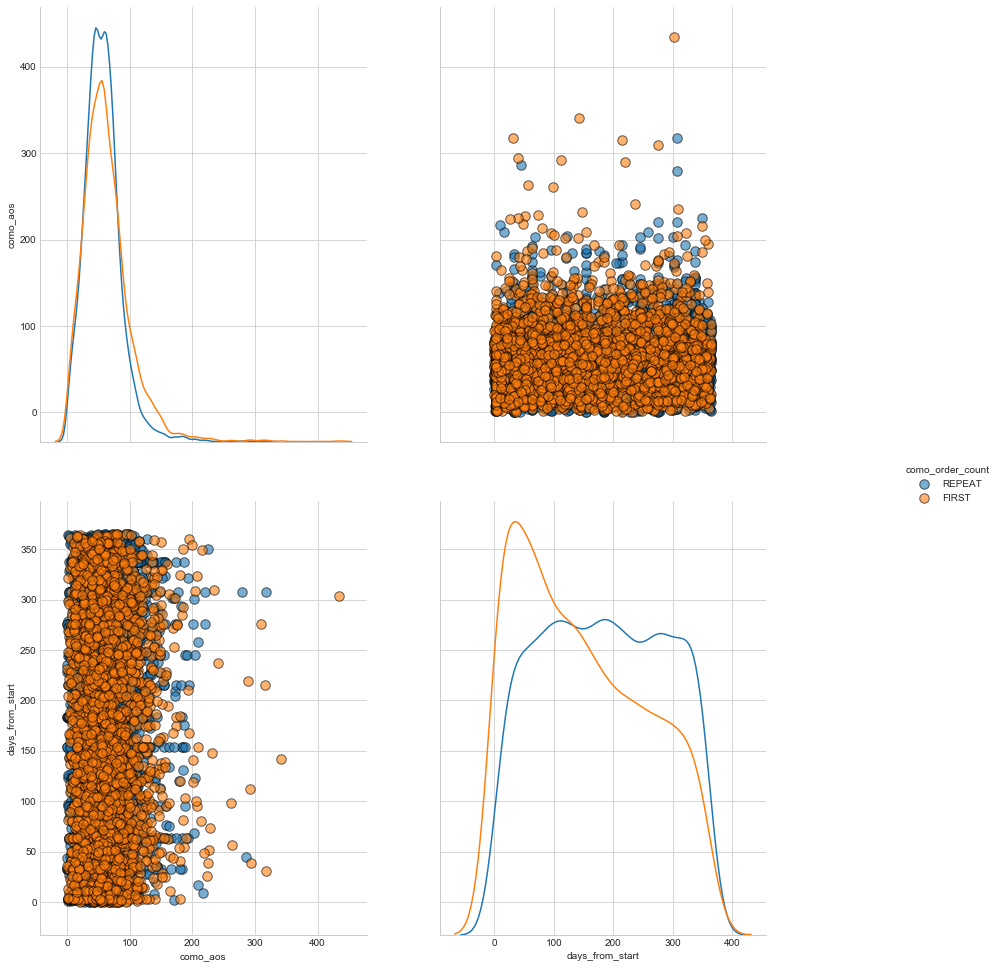

In [51]:
g=sb.pairplot(df_plot, hue = 'como_order_count', diag_kind = 'kde', 
              plot_kws = {'alpha': 0.6, 's': 90, 'edgecolor': 'k'})
g.fig.set_size_inches(15,15)

In [52]:
#logging the aos to create a more normal curve
df_plot['log_aos'] = np.log10(df_plot['como_aos'])
df_plot2 = df_plot.drop(columns = ['como_aos'])
df_plot2.head()

,days_from_start,warehouse_id,subscription_type,como_order_count,log_aos
12,193.0,FSE2,PAID,REPEAT,1.761763
69,17.0,FSE3,PAID,REPEAT,1.442323
103,124.0,FSE3,PAID,REPEAT,1.702530
126,99.0,FSE3,NO_PLAN,REPEAT,1.844308
158,84.0,FSE3,NO_PLAN,REPEAT,1.789740


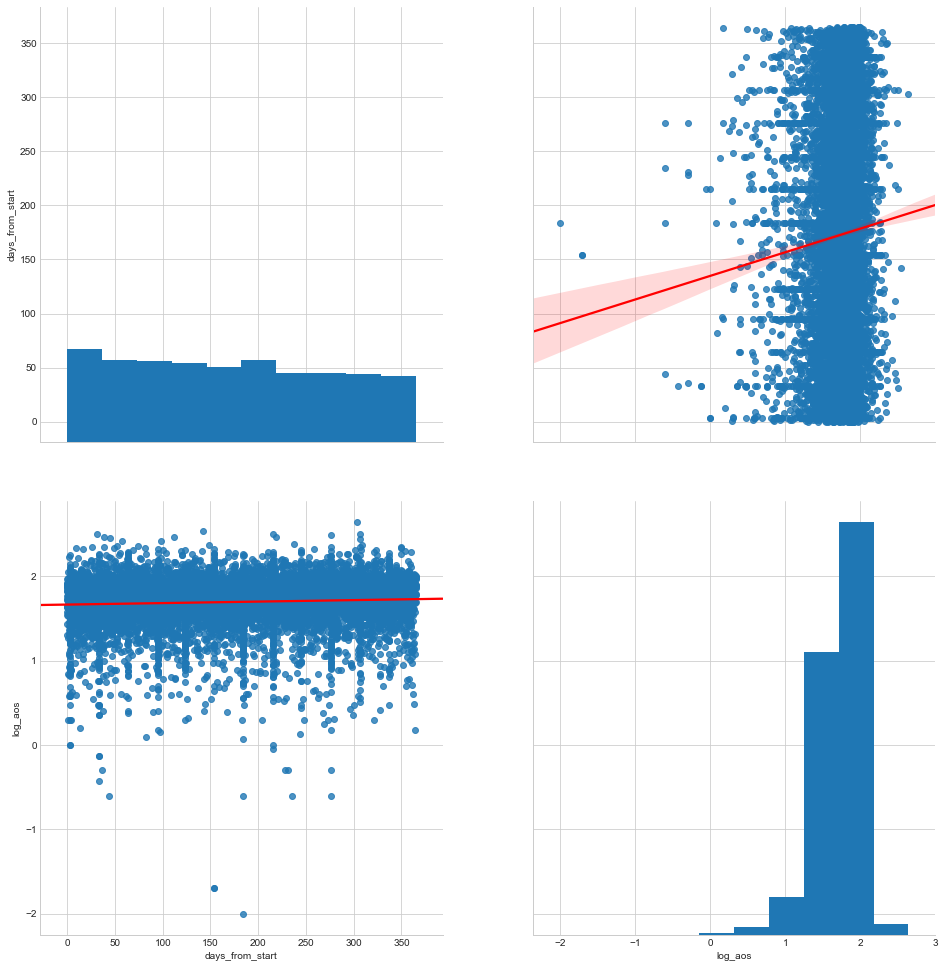

In [53]:
#Plotting out the original relation between COMO_AOS and Days from Start
g=sb.pairplot(df_plot2, kind="reg", plot_kws={'line_kws':{'color':'red'}})
g.fig.set_size_inches(15,15)

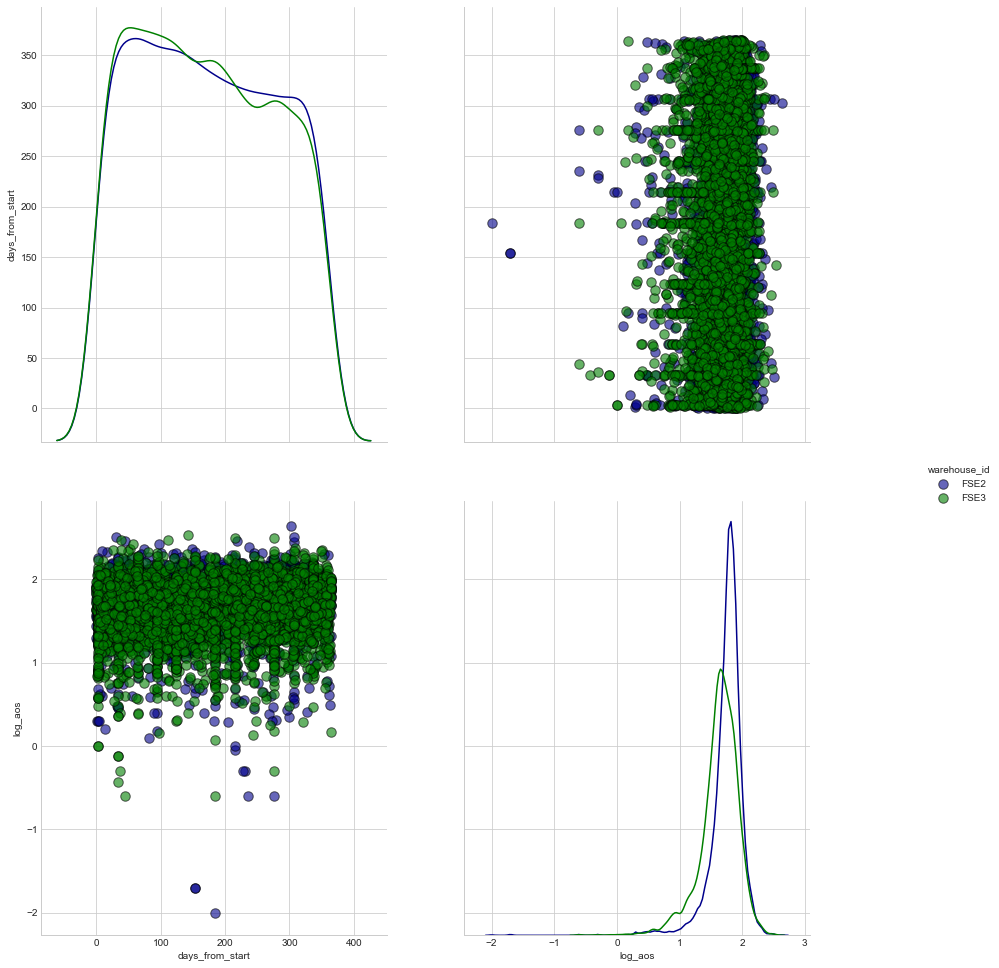

In [54]:
g=sb.pairplot(df_plot2, hue = 'warehouse_id', palette=["darkblue", "green"], diag_kind = 'kde', 
              plot_kws = {'alpha': 0.6, 's': 90, 'edgecolor': 'k'})
g.fig.set_size_inches(15,15)

# Random Forest Model

In [55]:
#Set train and test set
rfX_train, rfX_test, rfy_train, rfy_test = train_test_split(lmX, lmy, test_size=.25, random_state=0)

In [56]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(rfX_train, rfy_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [57]:
# Use the forest's predict method on the test data
rf_pred = rf.predict(rfX_test)

# Calculate the absolute errors
rf_errors = abs(rf_pred - rfy_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_errors), 2), 'degrees.')

Mean Absolute Error: 24.73 degrees.


In [58]:
Pred_RFy = pd.DataFrame(rf_pred)
Test_RFy = pd.DataFrame(rfy_test.reset_index())
print (Pred_RFy.head())
print (Test_RFy.head())

           0
0  43.885149
1  55.192020
2  49.591066
3  69.643581
4  48.185545
    index  como_aos
0  182807   56.8883
1   67794   73.0650
2  106685   43.0000
3  291703   24.5900
4  265420   23.5372


In [59]:
#A negative score means the model is worse than just a constant predictor
rf.score(rfX_test, rfy_test)

-0.10418905614365936

In [60]:
# Calculate mean absolute percentage error (MAPE)
rf_mape = 100 * (rf_errors / rfy_test)

# Calculate and display accuracy
rf_accuracy = 100 - np.mean(rf_mape)
#print('Accuracy:', round(rf_accuracy, 2), '%.')

In [61]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(xvar_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: days_from_start      Importance: 0.49
Variable: FIRST                Importance: 0.08
Variable: FSE2                 Importance: 0.07
Variable: PAID                 Importance: 0.06
Variable: Saturday             Importance: 0.06
Variable: Sunday               Importance: 0.06
Variable: Monday               Importance: 0.02
Variable: Thursday             Importance: 0.02
Variable: Tuesday              Importance: 0.02
Variable: Wednesday            Importance: 0.02
Variable: Apr                  Importance: 0.01
Variable: Aug                  Importance: 0.01
Variable: Feb                  Importance: 0.01
Variable: Jan                  Importance: 0.01
Variable: Jul                  Importance: 0.01
Variable: Jun                  Importance: 0.01
Variable: Mar                  Importance: 0.01
Variable: May                  Importance: 0.01
Variable: Nov                  Importance: 0.01
Variable: Sep                  Importance: 0.01
Variable: Oct                  Importanc

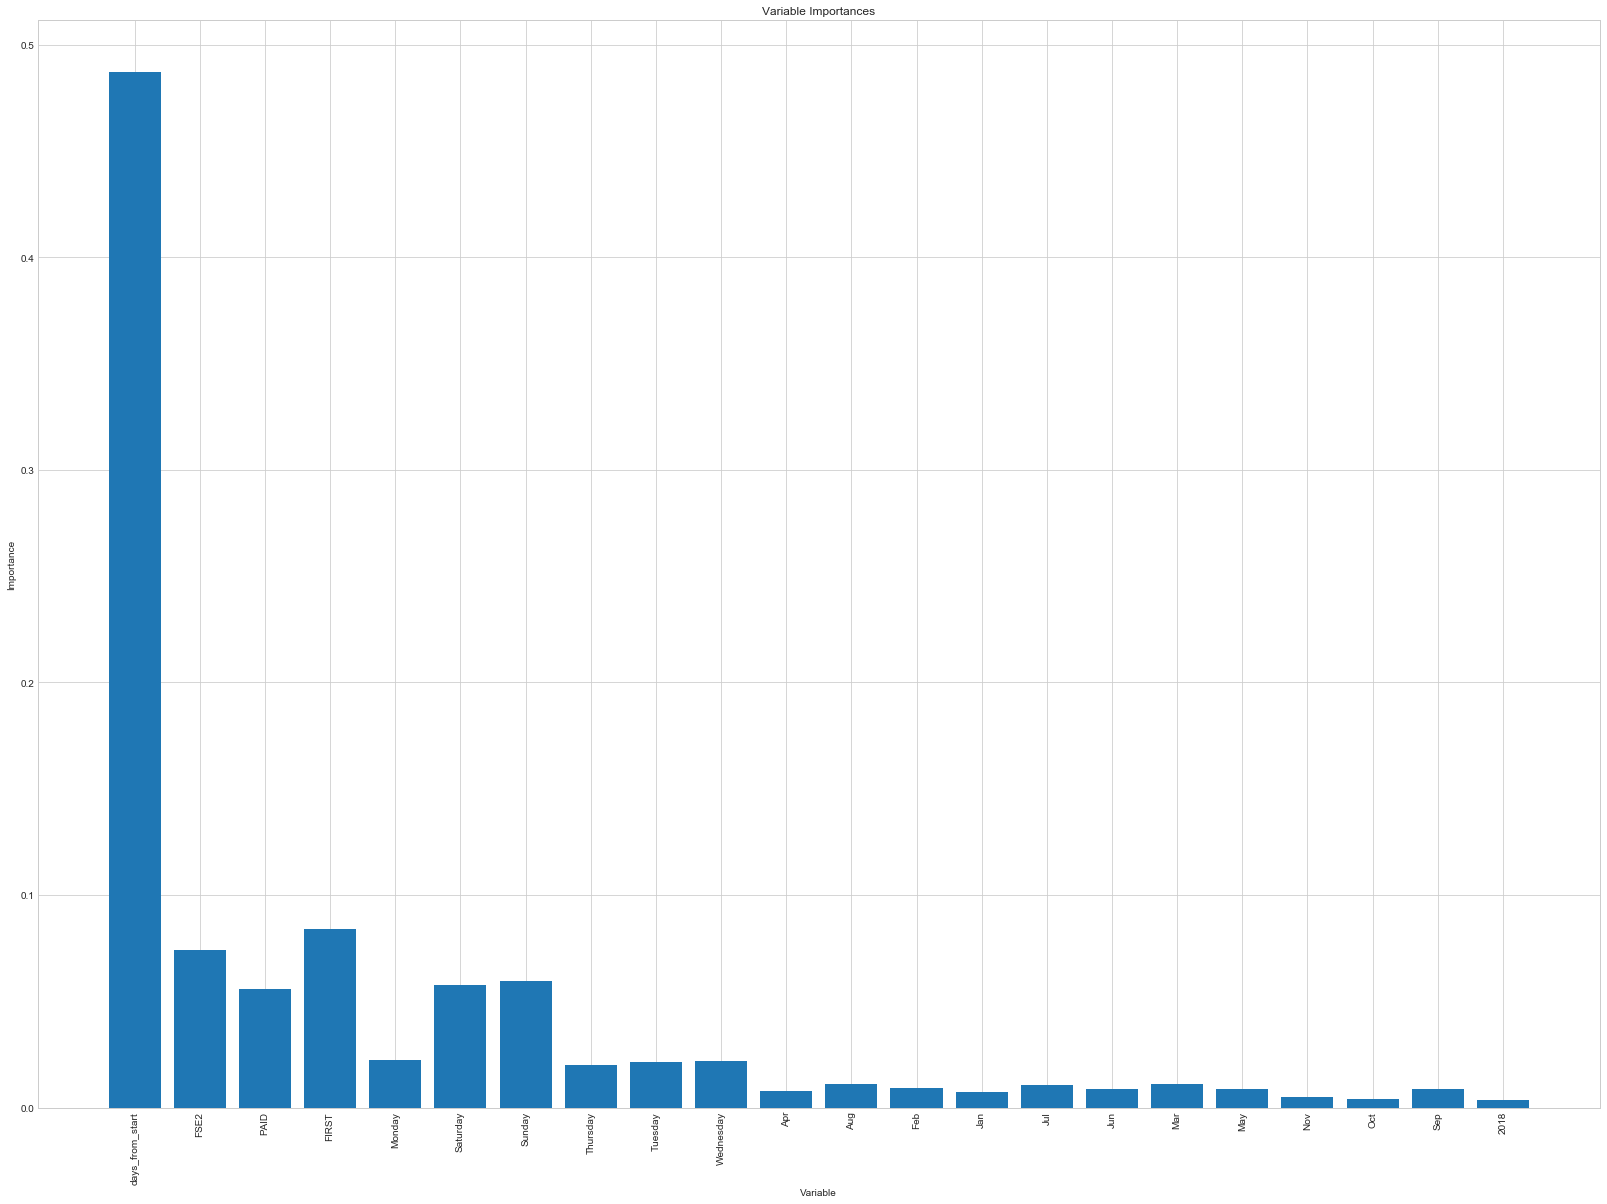

In [62]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, xvar_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [63]:
#Trying to display RF Trees
#i_tree = 0
#for tree_in_forest in rf.estimators_:
#    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
#        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
#    i_tree = i_tree + 1

In [64]:
#Improving the model
rf_new = RandomForestRegressor(n_estimators = 100, random_state=42, criterion = 'mse', max_depth = None, 
                               min_samples_split = 4, min_samples_leaf = 1)
rf_new.fit(rfX_train, rfy_train)

# Use the forest's predict method on the test data
rf_pred2 = rf_new.predict(rfX_test)

# Calculate the absolute errors
rf_errors2 = abs(rf_pred2 - rfy_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_errors2), 2), 'degrees.')

Mean Absolute Error: 24.23 degrees.


In [65]:
# Calculate mean absolute percentage error (MAPE)
rf_mape2 = 100 * (rf_errors2 / rfy_test)

# Calculate and display accuracy
rf_accuracy2 = 100 - np.mean(rf_mape2)
#print('Accuracy:', round(rf_accuracy2, 2), '%.')

In [66]:
# Get numerical feature importances
importances2 = list(rf_new.feature_importances_)

# List of tuples with variable and importance
feature_importances2 = [(feature, round(importance, 2)) for feature, importance in zip(xvar_list, importances2)]

# Sort the feature importances by most important first
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances2];

Variable: days_from_start      Importance: 0.48
Variable: FSE2                 Importance: 0.08
Variable: FIRST                Importance: 0.08
Variable: Saturday             Importance: 0.06
Variable: Sunday               Importance: 0.06
Variable: PAID                 Importance: 0.05
Variable: Monday               Importance: 0.02
Variable: Thursday             Importance: 0.02
Variable: Tuesday              Importance: 0.02
Variable: Wednesday            Importance: 0.02
Variable: Apr                  Importance: 0.01
Variable: Aug                  Importance: 0.01
Variable: Feb                  Importance: 0.01
Variable: Jan                  Importance: 0.01
Variable: Jul                  Importance: 0.01
Variable: Jun                  Importance: 0.01
Variable: Mar                  Importance: 0.01
Variable: May                  Importance: 0.01
Variable: Nov                  Importance: 0.01
Variable: Sep                  Importance: 0.01
Variable: Oct                  Importanc

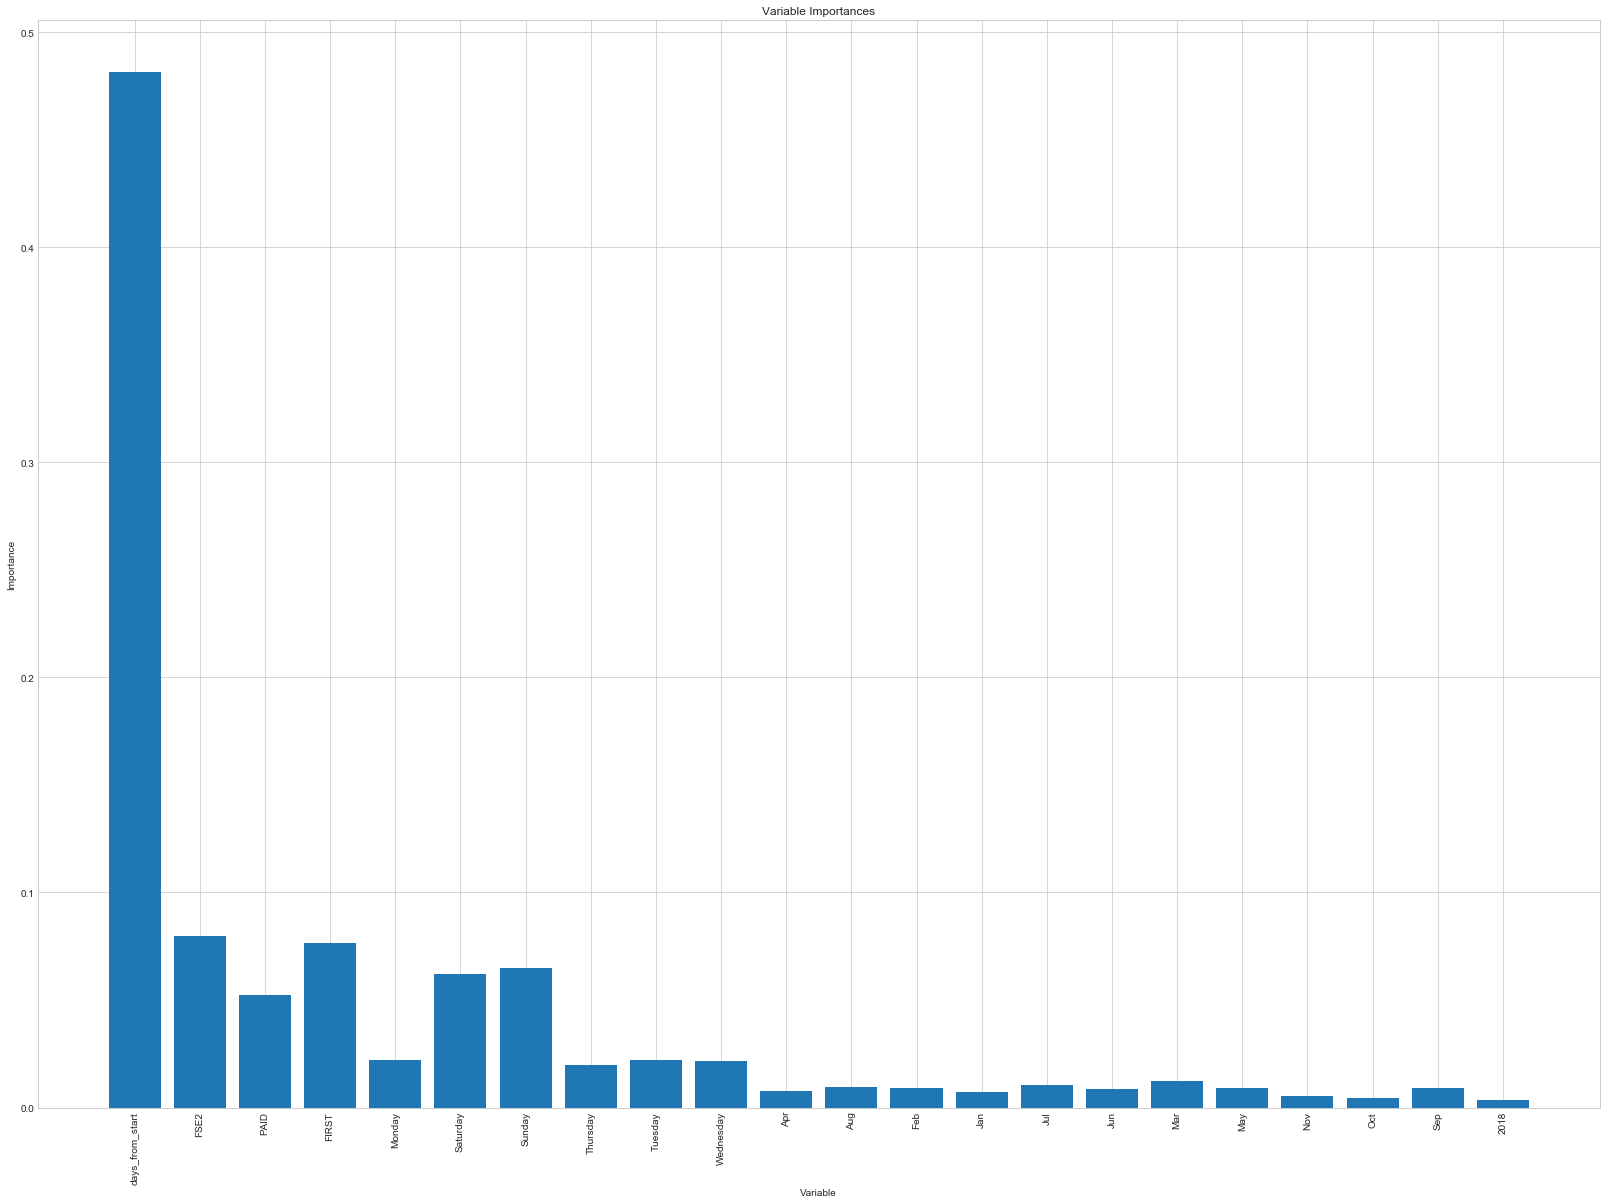

In [67]:
# list of x locations for plotting
x_values = list(range(len(importances2)))

# Make a bar chart
plt.bar(x_values, importances2, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, xvar_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# XGBoost

In [68]:
#Set train and test set
xgbX_train, xgbX_test, xgby_train, xgby_test = train_test_split(lmX, lmy, test_size=.25, random_state=0)

In [69]:
xgb = XGBRegressor(max_depth=2, learning_rate=0.09, n_estimators=250, silent=True, n_jobs=3)
xgb.fit(xgbX_train, xgby_train)
print (xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=3, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [70]:
xgby_pred = xgb.predict(xgbX_test)

In [71]:
# Calculate the absolute errors
xgb_errors = abs(xgby_pred - xgby_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(xgb_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
xgb_mape = 100 * (xgb_errors / xgby_test)
print ('Median MAPE:', round(np.median(xgb_mape), 2), '%')

# Calculate and display accuracy
#xgb_accuracy = 100 - np.mean(xgb_mape)
#print('Accuracy:', round(xgb_accuracy, 2), '%.')

Mean Absolute Error: 21.33 degrees.
Median MAPE: 26.26 %


In [72]:
xgb.score(xgbX_test, xgby_test)

0.12802999306285257

In [73]:
Pred_XGBy = pd.DataFrame(xgby_pred)
Test_XGBy = pd.DataFrame(xgby_test.reset_index())
print (Pred_XGBy.head())
print (Test_XGBy.head())

           0
0  44.560207
1  58.398354
2  63.067234
3  65.840439
4  43.700314
    index  como_aos
0  182807   56.8883
1   67794   73.0650
2  106685   43.0000
3  291703   24.5900
4  265420   23.5372


In [97]:
print (xgb.feature_importances_)

[0.42666668 0.08133333 0.06933333 0.06266667 0.01466667 0.02666667
 0.04533333 0.04933333 0.048      0.048      0.02666667 0.01333333
 0.008      0.         0.03866667 0.00133333 0.02133333 0.
 0.008      0.008      0.00266667 0.        ]


In [98]:
xgb_importances = list(xgb.feature_importances_)

# List of tuples with variable and importance
xgb_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(xvar_list, xgb_importances)]

# Sort the feature importances by most important first
xgb_feature_importances = sorted(xgb_feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in xgb_feature_importances];


Variable: days_from_start      Importance: 0.4300000071525574
Variable: FSE2                 Importance: 0.07999999821186066
Variable: PAID                 Importance: 0.07000000029802322
Variable: FIRST                Importance: 0.05999999865889549
Variable: Sunday               Importance: 0.05000000074505806
Variable: Thursday             Importance: 0.05000000074505806
Variable: Tuesday              Importance: 0.05000000074505806
Variable: Wednesday            Importance: 0.05000000074505806
Variable: Jul                  Importance: 0.03999999910593033
Variable: Saturday             Importance: 0.029999999329447746
Variable: Apr                  Importance: 0.029999999329447746
Variable: Mar                  Importance: 0.019999999552965164
Variable: Monday               Importance: 0.009999999776482582
Variable: Aug                  Importance: 0.009999999776482582
Variable: Feb                  Importance: 0.009999999776482582
Variable: Nov                  Importance: 0.00999

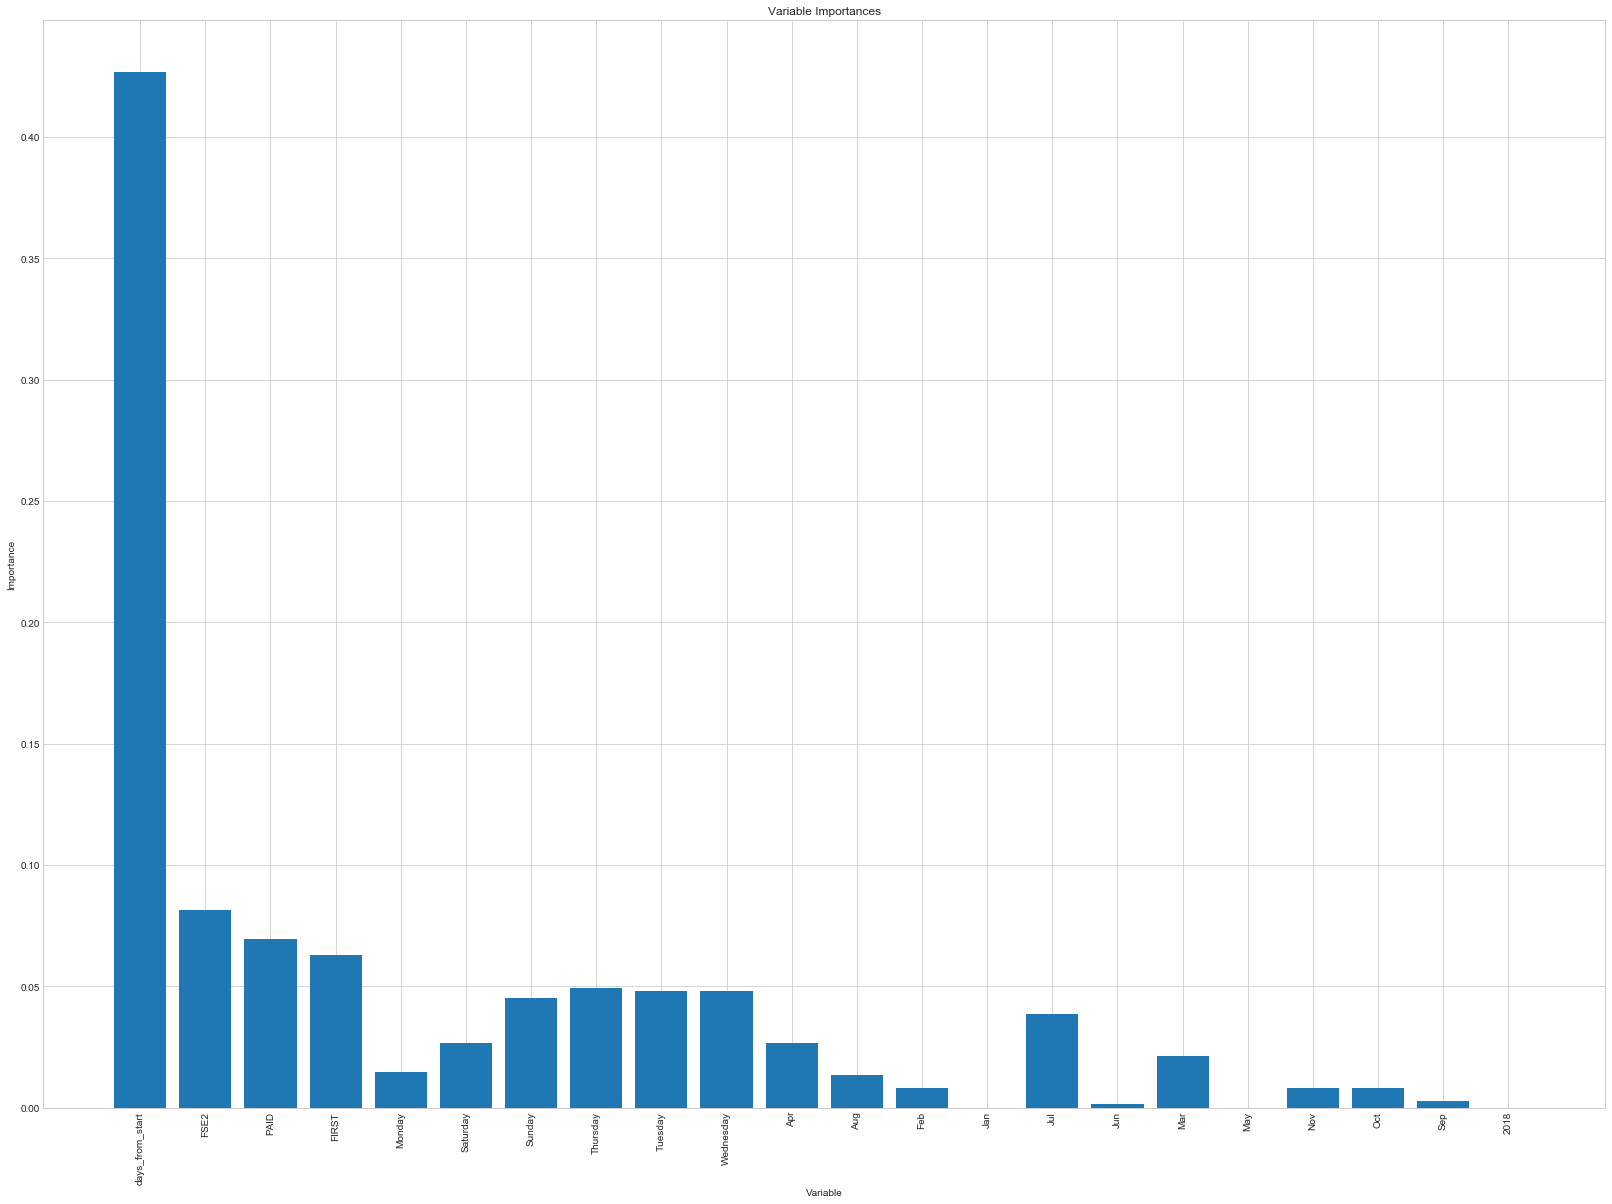

In [99]:
# list of x locations for plotting
xgb_values = list(range(len(xgb_importances)))

# Make a bar chart
plt.bar(xgb_values, xgb_importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(xgb_values, xvar_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [100]:
# Old version of plotting IMPORTANCES
#plot_importance(xgb)
#pyplot.show()

# Scoring the Models

In [78]:
#Mean Absolute Errors
errors = abs(lmy_pred - lmy_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
lmy_mape = 100 * (errors / lmy_test)
print ('Median MAPE:', round(np.median(lmy_mape), 2), '%')

Mean Absolute Error: 21.63 degrees.
Median MAPE: 26.71 %


In [79]:
# Calculate the absolute errors
rf_errors = abs(rf_pred - rfy_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
rf_mape = 100 * (rf_errors / rfy_test)
print ('Median MAPE:', round(np.median(rf_mape), 2), '%')

Mean Absolute Error: 24.73 degrees.
Median MAPE: 32.47 %


In [80]:
# Calculate the absolute errors
rf_errors2 = abs(rf_pred2 - rfy_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_errors2), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
rf2_mape = 100 * (rf_errors2 / rfy_test)
print ('Median MAPE:', round(np.median(rf2_mape), 2), '%')

Mean Absolute Error: 24.23 degrees.
Median MAPE: 31.64 %


In [81]:
# Calculate the absolute errors
xgb_errors = abs(xgby_pred - xgby_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(xgb_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
xgb_mape = 100 * (xgb_errors / xgby_test)
print ('Median MAPE:', round(np.median(xgb_mape), 2), '%')

Mean Absolute Error: 21.33 degrees.
Median MAPE: 26.26 %


# Scoring using portions of both models

In [92]:
comb_pred = (0.7*xgby_pred) + (0.3*lmy_pred)
comb_pred

array([45.43064735, 57.82125338, 63.58260105, ..., 77.01135728,
       67.8865194 , 45.52136874])

In [95]:
xgby_pred

array([44.560207, 58.398354, 63.067234, ..., 77.96912 , 65.89739 ,
       45.209724], dtype=float32)

In [96]:
lmy_pred

array([47.46167653, 56.47469388, 64.7851228 , ..., 74.776589  ,
       72.52781857, 46.24854006])

In [101]:
#xgby_test

In [93]:
# Calculate the absolute errors
comb_errors = abs(comb_pred - xgby_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(comb_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
comb_mape = 100 * (comb_errors / xgby_test)
print ('Median MAPE:', round(np.median(comb_mape), 2), '%')

Mean Absolute Error: 21.38 degrees.
Median MAPE: 26.29 %
